In [1]:
import math
import numpy as np

def DSR(lambda_, y, b):

    if y < b:
        M = b
    elif y >= b and y <= min(b * (lambda_ + 1) - 1, (b - 1) / lambda_):
        M = y + 1
    else:
        M = math.ceil(lambda_ * b)
    
    return M

def KD(lambda_, y, b):
    if y < b:
        M = math.ceil(b / lambda_)
    else:
        M = math.ceil(lambda_ * b)
        
    return M


In [2]:
def prediction_specific_con_rob(M, y, b):
    opt = min(y, b)
    if M <= y:
        alg = M - 1 + b
    else:
        alg = y
    p_s_con = alg / opt

    p_s_rob = 0

    for x in range(1, 5000):
        opt = min(x, b)
        if M <= x:
            alg = M - 1 + b
        else:
            alg = x
        ratio = alg / opt
        if ratio > p_s_rob:
            p_s_rob = ratio

    return p_s_con, p_s_rob

prediction_specific_con_rob(2, 5, 10)

(2.2, 5.5)

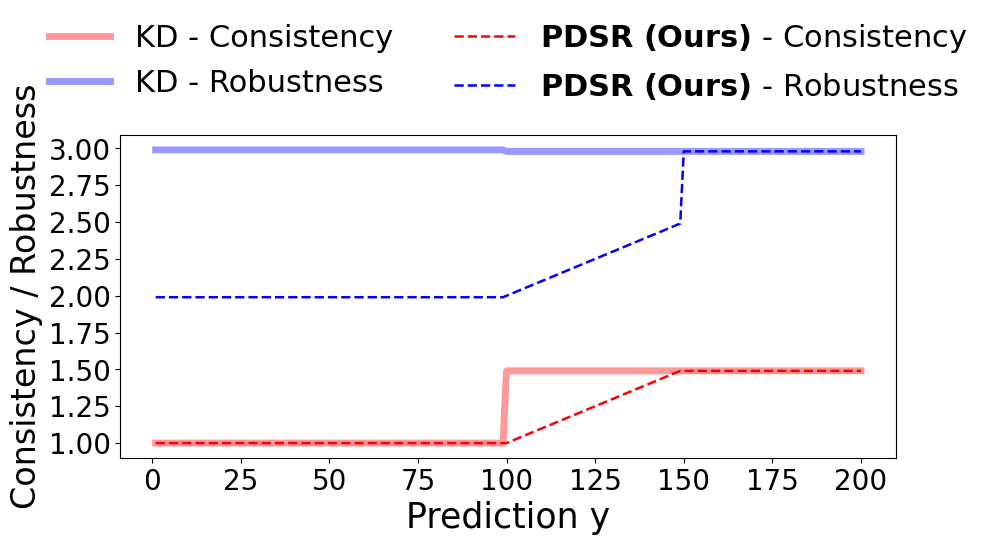

In [3]:
import matplotlib.pyplot as plt

lambda_ = 0.5
b = 100
y_values = list(range(1, 201))
con_dsr, rob_dsr = [], []
con_kd, rob_kd = [], []

for y in y_values:
    M_dsr = DSR(lambda_, y, b)
    M_kd = KD(lambda_, y, b)
    c_dsr, r_dsr = prediction_specific_con_rob(M_dsr, y, b)
    c_kd, r_kd = prediction_specific_con_rob(M_kd, y, b)
    con_dsr.append(c_dsr)
    rob_dsr.append(r_dsr)
    con_kd.append(c_kd)
    rob_kd.append(r_kd)

plt.figure(figsize=(10, 6))

# Color scheme
color_con = 'red'
color_rob = 'blue'

# Plot KD - transparent solid lines, thicker
plt.plot(y_values, con_kd, label='KD - Consistency', color=color_con, linestyle='-', alpha=0.4, linewidth=5)
plt.plot(y_values, rob_kd, label='KD - Robustness', color=color_rob, linestyle='-', alpha=0.4, linewidth=5)

# Plot PDSR - opaque dashed lines, normal width
plt.plot(y_values, con_dsr, label=r'$\bf{PDSR\ (Ours)}$ - Consistency', color=color_con, linestyle='--', alpha=1.0, linewidth=1.8)
plt.plot(y_values, rob_dsr, label=r'$\bf{PDSR\ (Ours)}$ - Robustness', color=color_rob, linestyle='--', alpha=1.0, linewidth=1.8)

# Labels and formatting
plt.xlabel('Prediction y', fontsize=25)
plt.ylabel('Consistency / Robustness', fontsize=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(
    fontsize=22,
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    frameon=False
)
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.show()